# NYC Flights 2013 Dataset Analysis

In [305]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.1.0 (need at least 1.0)
Numpy version:        1.11.1 (need at least 1.7.1)
SciPy version:        0.18.1 (need at least 0.12.0)
Pandas version:       0.18.1 (need at least 0.11.0)
Mapltolib version:     1.5.3 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)


## Performing Exploratory Data Analysis

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [307]:
flights_df= pd.read_csv('flights.csv')

In [308]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [309]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1.0,1.0,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1.0,1.0,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1.0,1.0,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1.0,1.0,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1.0,1.0,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1.0,1.0,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1.0,1.0,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1.0,1.0,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1.0,1.0,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1.0,1.0,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Specific questions that may arise from the dataset

(a) How many flights were there from NYC airports to Seattle in 2013?

In [310]:
#subsetting the dataframe based on location and origin, taking the count after subsetting
len(flights_df[(flights_df.dest=='SEA') & ((flights_df.origin == 'EWR') | (flights_df.origin == 'LGA') | (flights_df.origin == 'JFK'))])                                         

3923

 There were 3923 flights from NYC to Seattle in 2013.

(b) How many airlines fly from NYC to Seattle?

In [311]:
#subsetting the dataframe based on location and origin, taking the unique count of carriers after subsetting
len(flights_df[(flights_df.dest=='SEA') & ((flights_df.origin == 'EWR') | (flights_df.origin == 'LGA') | (flights_df.origin == 'JFK'))].carrier.unique())                                      

5

There are 5 airlines flying from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [312]:
#subsetting the dataframe based on location and origin, taking the unique count of tailnum after subsetting
len(flights_df[(flights_df.dest=='SEA') & ((flights_df.origin == 'EWR') | (flights_df.origin == 'LGA') | (flights_df.origin == 'JFK'))].tailnum.unique())                                      

936

There are 936 unique air planes flying from NYC to Seattle.

(d) What is the average arrival delay for flights from NC to Seattle?

In [313]:
#subsetting the dataframe based on location and origin, taking the mean of arr_delay after subsetting (excluding non delayed flights)
flights_df_filtered = flights_df[(flights_df.arr_delay>0) & (flights_df.dest=='SEA') & ((flights_df.origin == 'EWR') | (flights_df.origin == 'LGA') | (flights_df.origin == 'JFK'))]     
print(np.mean(flights_df_filtered.arr_delay))

#subsetting the dataframe based on location and origin, taking the mean of arr_delay after subsetting (including non delayed flights)
flights_df_filtered = flights_df[(flights_df.dest=='SEA') & ((flights_df.origin == 'EWR') | (flights_df.origin == 'LGA') | (flights_df.origin == 'JFK'))]     
print (np.mean(flights_df_filtered.arr_delay))

39.79984239558708
-1.0990990990990992


I have filtered out only the flights that had arrival delay at the Seattle airport. Thus to find the average arrival delay, I am not considering the flights that were on time or reached before time. Thus the arrival delay for flights from NYC to Seattle is 39.79984 minutes.

If we take all the flights landing at Seattle from NYC, then the average arrival delay decreases to -1.09 minutes.

(e) What proportion of flights to Seattle come from each NYC airport?

In [314]:
#Subsettign dataframe based on destination as Seattle
flights_seattle_bound_df = flights_df[(flights_df.dest == 'SEA')]  

#Grouping by origin and taking sum count of flights from individual origin locations
grouped_data = flights_seattle_bound_df.groupby([flights_seattle_bound_df.origin]).size()

#Dividing the sum count of flight from individual locations by total flights to find percentage
print (pd.DataFrame({'Percentage':grouped_data / len(flights_seattle_bound_df)}))

        Percentage
origin            
EWR       0.466735
JFK       0.533265


Firstly, I have filtered the dataset to flights bound to Seattle destination. Then I have grouped the flights by their origin. To find the proportion of flights from each of the airport, using the number of flights from each airport, I have divided each by the total number of flights from NYC to Seattle which is the length of the filtered data frame. Thus there are 46.67% flights to Seattle are from EWR airport and 53.33% flights are from JFK airport flying out of NYC.

Flights are often delayed. Let us explore some delay patterns

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [380]:
#Method 1
#Grouping flights df by month and day and caluclating mean directly
grouped_data = flights_df.groupby([flights_df.month,flights_df.day]).mean()
print(max(grouped_data.arr_delay))
print(max(grouped_data.dep_delay))



85.8621553885
83.5369211514


Largest average departure delay is 83.53 minutes.
Largest average arrival delay is 85.86 minutes.

In [386]:
#Method 2
#Using pivot table function on flights df which automatically calculates the aggregated mean of a column (dep_delay)
#over the given set of columns (month, day). Sorting in descending order to find max value as the first values
pivot_df_dep_delay=flights_df.pivot_table(columns=['month', 'day'], values='dep_delay')
print(pivot_df_dep_delay.sort_values(ascending=False).head(1))

#Using pivot table function on flights df which automatically calculates the aggregated mean of a column (arr_delay)
#over the given set of columns (month, day). Sorting in descending order to find max value as the first values
pivot_df_arr_delay=flights_df.pivot_table(columns=['month', 'day'], values='arr_delay')
print(pivot_df_arr_delay.sort_values(ascending=False).head(1))

month  day
3.0    8.0    83.536921
dtype: float64
month  day
3.0    8.0    85.862155
dtype: float64


In [ ]:
Largest average departure delay is 83.53 minutes.
Largest average arrival delay is 85.86 minutes.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [316]:
#Method 1
#Using Method 1 from above solution and subsetting the grouped data to find the max dep_delay value 
grouped_data = flights_df.groupby([flights_df.month,flights_df.day]).mean()
print(grouped_data[grouped_data.dep_delay == max(grouped_data.dep_delay)])

                Unnamed: 0     dep_time  dep_delay     arr_time  arr_delay  \
day month year                                                               
8.0 3.0   2013    143267.0  1416.659574  83.536921  1503.931078  85.862155   

                     flight    air_time     distance       hour     minute  
day month year                                                              
8.0 3.0   2013  2013.537283  153.746867  1002.540347  13.867334  29.926158  


The worst day to fly out of NYC in 2013 is 8th March as the this was the day with max average delay in departure.

In [388]:
#Method 2
#Using pivot table function on flights df which automatically calculates the aggregated mean of a column (dep_delay)
#over the given set of columns (month, day). Sorting in descending order to find max value as the first values
pivot_df_dep_delay=flights_df.pivot_table(columns=['month', 'day'], values='dep_delay')
print(pivot_df_dep_delay.sort_values(ascending=False).head(1))

month  day
3.0    8.0    83.536921
dtype: float64


Using this method as well 8th March 2013 is the worst day to fly if a person disliked delyed flights based on average delay in departure being the highest.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

    month  Mean_Delay_Departure
0     1.0             10.036665
1     2.0             10.816843
2     3.0             13.227076
3     4.0             13.938038
4     5.0             12.986859
5     6.0             20.846332
6     7.0             21.727787
7     8.0             12.611040
8     9.0              6.722476
9    10.0              6.243988
10   11.0              5.435362
11   12.0             16.576688


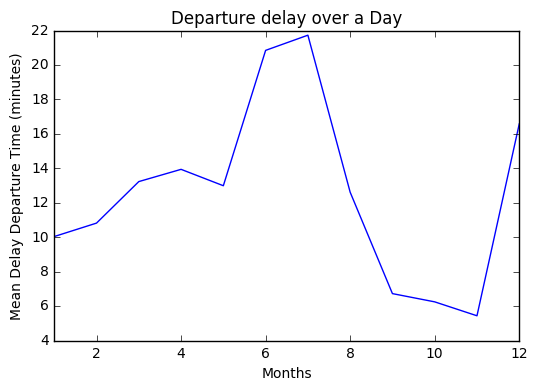

In [379]:
#Method 1
#grouping flights df to calculate mean departure delay over the months
grouped_data = pd.DataFrame(flights_df.groupby([flights_df.month])['dep_delay'].mean().reset_index(name='Mean_Delay_Departure'))
print(grouped_data)

#Plotting Mean Departure delay over a Day
plt.plot(grouped_data.month, grouped_data.Mean_Delay_Departure,'')
plt.xlim(1, 12)
plt.ylabel('Mean Delay Departure Time (minutes)')
plt.xlabel('Months')
plt.title('Mean Departure delay over a Day')
plt.show()

We see a peculiar seasonal pattern. The delays are more during holiday seasons like the summers and end of year. This is tiem usually when people travel the most and hence due to more passenger traffic, we could expect delays at the airports.

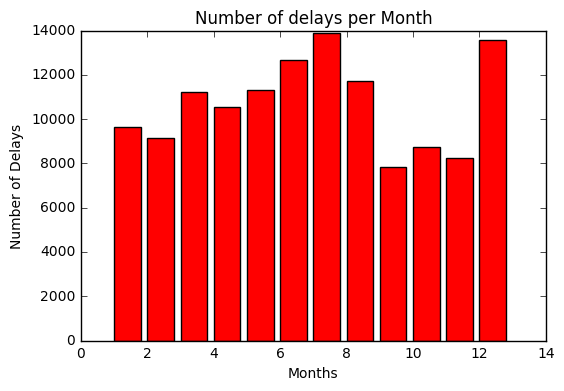

In [406]:
#Method 2
#Filtering flights df to capture only delyed flights over the whole population
filtered_flights_df = flights_df[flights_df.dep_delay > 0]

#Grouping by month to find the count of delays
grouped_data = pd.DataFrame(filtered_flights_df.groupby([filtered_flights_df.month])['dep_delay'].size().reset_index(name='Count'))

#Plotting Number of delays per Month
plt.bar(grouped_data.month, grouped_data.Count, color="red")
plt.ylabel('Number of Delays')
plt.xlabel('Months')
plt.title('Number of delays per Month')
plt.show()

From the above visualization we can again see that number of delays are higher during the holiday season and lower during non- holiday seasons.

(d) On average, how do departure delays vary over the course of a day?

    hour  Mean_Delay_Departure
0    0.0            128.642452
1    1.0            207.049327
2    2.0            239.921875
3    3.0            304.727273
4    4.0             -5.554098
5    5.0             -4.355644
6    6.0             -1.520552
7    7.0              0.223289
8    8.0              1.091432
9    9.0              4.268295
10  10.0              5.548644
11  11.0              5.652309
12  12.0              7.601892
13  13.0              9.380639
14  14.0              8.090381
15  15.0             10.682049
16  16.0             13.621150
17  17.0             16.756593
18  18.0             18.664671
19  19.0             21.497342
20  20.0             28.266213
21  21.0             42.064964
22  22.0             68.190042
23  23.0             96.946865
24  24.0             64.862069


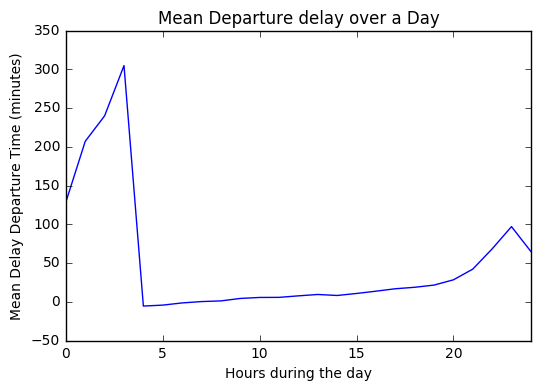

In [405]:
#Method 1
#Grouping flights df over hour to understand the variation over the course of a day, calculating mean departure delay
grouped_data = pd.DataFrame(flights_df.groupby([flights_df.hour])['dep_delay'].mean().reset_index(name='Mean_Delay_Departure'))
print(grouped_data)

plt.plot(grouped_data.hour, grouped_data.Mean_Delay_Departure,'')
plt.xlim(0, 24)
plt.ylabel('Mean Delay Departure Time (minutes)')
plt.xlabel('Hours during the day')
plt.title('Mean Departure delay over a Day')
plt.show()

The departure delays are higher in the late night - early morning flights to the mid day flights. The reason for this could be more number of flights taking off during night times. 

    hour  Count  Total_Count  Percentage_Delays
0    0.0    881          881         100.000000
1    1.0    223          223         100.000000
2    2.0     64           64         100.000000
3    3.0     11           11         100.000000
4    5.0    368         7246           5.078664
5    6.0   4126        22699          18.177012
6    7.0   4455        21461          20.758585
7    8.0   6190        26424          23.425674
8    9.0   5508        18871          29.187642
9   10.0   5009        16076          31.158248
10  11.0   4813        16762          28.713757
11  12.0   5668        16071          35.268496
12  13.0   7061        16890          41.805802
13  14.0   7555        20480          36.889648
14  15.0  10568        22840          46.269702
15  16.0  10653        22336          47.694305
16  17.0  11558        22144          52.194725
17  18.0  10413        21549          48.322428
18  19.0  10595        19940          53.134403
19  20.0   9077        16160          56

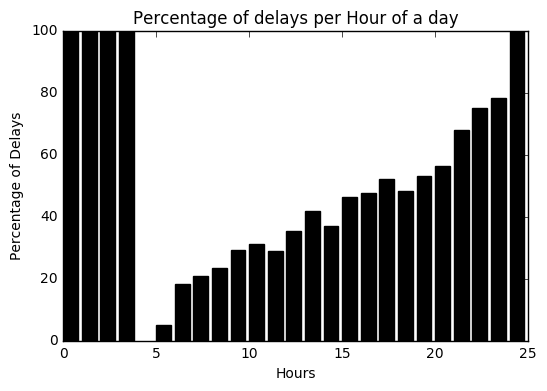

In [417]:
#Method 2
#Filtering flights df to capture only delayed flights over the whole population
filtered_flights_df = flights_df[flights_df.dep_delay > 0]

#Grouping by hour to find the count of delays
grouped_data = pd.DataFrame(filtered_flights_df.groupby([filtered_flights_df.hour])['dep_delay'].size().reset_index(name='Count'))

#Grouping by hour to find the total count of flights over a day to further find the percentage of delays
grouped_data_non_filtered = pd.DataFrame(flights_df.groupby([flights_df.hour])['dep_delay'].size().reset_index(name='Total_Count'))

#Merging both the dataframes
df_merged = pd.merge(grouped_data, grouped_data_non_filtered, on=['hour'])

df_merged['Percentage_Delays'] = (df_merged.Count/df_merged.Total_Count)*100
print(df_merged)
#Plotting Number of delays per Hour of a day
plt.bar(df_merged.hour, df_merged.Percentage_Delays, color="black")
plt.ylabel('Percentage of Delays')
plt.xlabel('Hours')
plt.title('Percentage of delays per Hour of a day')
plt.show()

From above visualization we can see that 100% of flights are delayed for late night - early morning. Thus there is trend during the day. We can also gather from above that not many flights fly during late night - early morning times thus the reason for such delays is not known.

Which flight departing NYC in 2013 flew the fastest?

In [381]:
#Calculating speed based on distance travelled and air_time
flights_df['speed'] = flights_df['distance']/flights_df['air_time']

#Filtering based on max overall speed of plane in travelling to its destination
print(flights_df[(flights_df.speed == max(flights_df.speed))]['flight'])

216447    1499
Name: flight, dtype: int64


Flight number 1499 flew the fastest from NYC in 2013. 

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [384]:
#Grouping by carrier + flight + dest and counting the number of such flights 
#thus we get the number of days the same carrier + flight + dest has happened
grouped_data = pd.DataFrame(flights_df.groupby([flights_df.carrier,flights_df.flight,flights_df.dest]).size().reset_index(name='Count'))

#Filtering on max value of the count to find all such combinations
grouped_data[grouped_data.Count == max(grouped_data.Count)]

,carrier,flight,dest,Count
767,AA,59,SFO,365
775,AA,119,LAX,365
783,AA,181,LAX,365
904,AA,1357,SJU,365
914,AA,1611,MIA,365
1118,B6,219,CLT,365
1147,B6,359,BUR,365
1150,B6,371,FLL,365
1169,B6,431,SRQ,365
1243,B6,703,SJU,365


The above 18 different flights happen everyday. The location of the final destination is given by the dest column.

Exploring through research questions


Research Question - Which carriers have been the top and the bottom performers in 2013?

Why this question?
I think this quesion will help us identify the carriers which have been performing badly through out the year. By knowing this we can help the general public to avoid commuting by this carrier.

I feel that to answer this question we would have to look at the number of flights departing delayed and also arriving  delayed. I plan to ignore the flights which departed delayed though arrived on or before time, as in all the time was covered up while flying. Although there is a ethical promise that a carrier makes to start on scheduled time, I plan to ignore this concern in my below analysis.

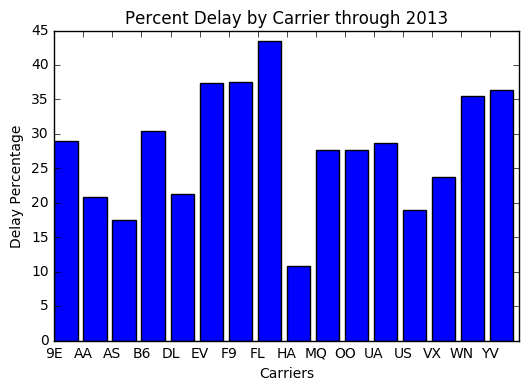

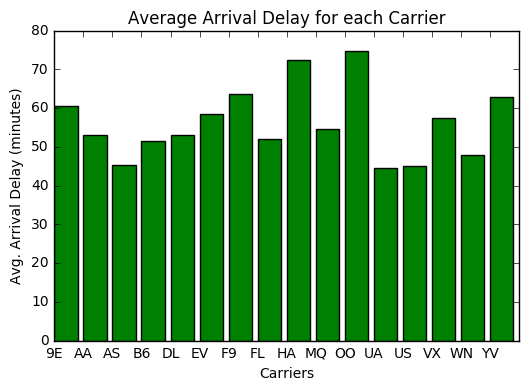

In [321]:
#Fitering dataset for flights having arr_delay>0 and dep_delay>0
flights_df_filtered_carrier = flights_df[(flights_df.arr_delay>0) & (flights_df.dep_delay>0)]  

#Grouping by carrier and getting the count
grouped_career_filtered = flights_df_filtered_carrier.groupby([flights_df_filtered_carrier.carrier]).size().reset_index(name='Size')
grouped_career_filtered

#Removing NA's from dep_time column
flights_df_filtered_total = flights_df[np.isfinite(flights_df['dep_time'])] 

#Grouping by carrier to find the total count for each carrier
grouped_career_total = flights_df_filtered_total.groupby([flights_df_filtered_total.carrier]).size().reset_index(name='Total_Size')
grouped_career_total

#Merging both the dataframes
df_col_merged = pd.merge(grouped_career_filtered, grouped_career_total, on=['carrier'])

#CalculatingPercentage delays
df_col_merged['Percentage_Delays'] = (df_col_merged.Size/df_col_merged.Total_Size)*100

df_col_merged

#Plotting Percent Delay by Carrier through 2013
ind = np.arange(len(df_col_merged.carrier))
plt.bar(ind, df_col_merged.Percentage_Delays, color="blue")
plt.ylabel('Delay Percentage')
plt.xlabel('Carriers')
plt.title('Percent Delay by Carrier through 2013')
plt.xticks(ind, df_col_merged.carrier)
plt.show()

#Grouping by carrier and getting the mean arrival delay
df_mean_arr_delay = flights_df_filtered_carrier.groupby([flights_df_filtered_carrier.carrier])['arr_delay'].mean().reset_index(name='Mean_Arrival_Delay')

#Plotting Average Arrival Delay for each Carrier
ind = np.arange(len(df_mean_arr_delay.carrier))
plt.bar(ind, df_mean_arr_delay.Mean_Arrival_Delay, color="green")
plt.ylabel('Avg. Arrival Delay (minutes)')
plt.xlabel('Carriers')
plt.title('Average Arrival Delay for each Carrier')
plt.xticks(ind, df_col_merged.carrier)
plt.show()

Analysis - 
The performance of the carrier can be gauged by (1) what percentage of flights of a particular carrier are delayed in departure and also delayed in arrival and (2) what is the average delay in arrival time for each of the carrier over the year of 2013.

Firstly, looking at the visualization (Percent Delay by Carrier through 2013), we observe that carrier FL has the highest delay %, thus making it the least performer among other carriers. Carrier HA has the best performance in terms of delay %.

Secondly, looking at the visualization (Average Arrival Delay for each Carrier), we observe that OO and HA have higher arrival delays among other carriers. UA and US carriers perform best when looking from this perspective. I have considered average arrival delay because I feel that in all for a traveller the delay in reaching a particular point is more significant than delay in departure.

What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [364]:
#Loading weather data
weather_df= pd.read_csv('weather.csv')

#Filtering only delayed flights from all airports
flights_df_filtered_delayed = flights_df[(flights_df.dep_delay>0)] 

#Grouping by origin, hour, day and month, as analysis would be at the granularity of the weather dataset
groupby_output = flights_df_filtered_delayed.groupby([flights_df_filtered_delayed.origin, flights_df_filtered_delayed.month, flights_df_filtered_delayed.day, flights_df_filtered_delayed.hour])
grouped_origin_time_hour = groupby_output['dep_delay'].agg([np.size, np.mean]).reset_index()

Above, I have loaded the flights and weather dataset and also filtered data according to delayed or not delayed as that will help in comparison when combined with the weather datset. By filtering out the delayed flights, I plan to study average time delay and number of delays per some of the variables (visib, wind_speed, wind_gust) in the weather dataset. If we consider the whole dataset, without filtering, then due to averaging out we could miss out on some of the specific flights that were actually delayed because there are flights which have departed early. Thus to avoid such a miss, I have considered only delayed flights for analysis. Also some of the plane models might not be affected by weather and hence might takeoff on or before time, to remove those biases, I consider only delyed flights.

As the granularity of analysis would of the weather dataset, I have grouped the flight_delayed dataset by origin and time_hour bringing it to similar granularity. By grouping, I have calculated the average delay time at a particular time_hour and airport and also calculated total count of delays at a particular time_hour and airport.

In [363]:
#Joining the above output with the weather dataset. This is an inner join and the hour-day-month for which 
#data is not present in weather dataset are omitted.
df_weather_flights_merged = pd.merge(grouped_origin_time_hour, weather_df, on=['origin','hour','day','month'])

#Renaming Columns
df_weather_flights_merged = df_weather_flights_merged.rename(columns={'size': 'Count', 'mean': 'TotalDelay'})

Above, I have merged the weather and the grouped dataset so that it will help in analysis. The merging is done on origin and time_hour columns.

    visib  TotalDelay      Count
                 mean       mean
0    0.12   53.125926   9.333333
1    0.25   50.368918   9.266667
2    0.50   48.025944   8.081081
3    0.75  108.043222  10.375000
4    1.00   44.052121   8.615385
5    1.25   99.533333  15.000000
6    1.50   57.758718  10.785714
7    1.75  106.130952   7.000000
8    2.00   53.179340  10.566265
9    2.50   57.614434   9.750000
10   3.00   43.960403  11.780488
11   4.00   44.990879   9.128571
12   5.00   45.245112  10.178947
13   6.00   45.309186   7.691729
14   7.00   42.906023   8.536000
15   8.00   41.097958   8.829268
16   9.00   46.031925   9.126394
17  10.00   36.867483   7.761381


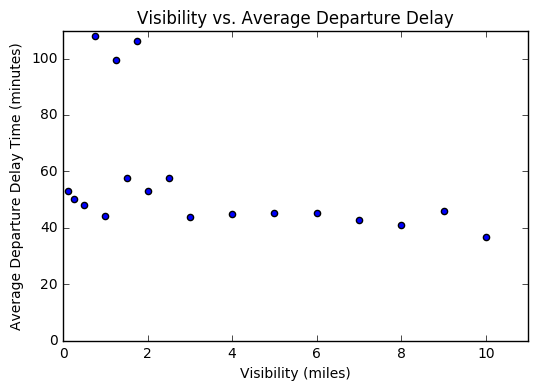

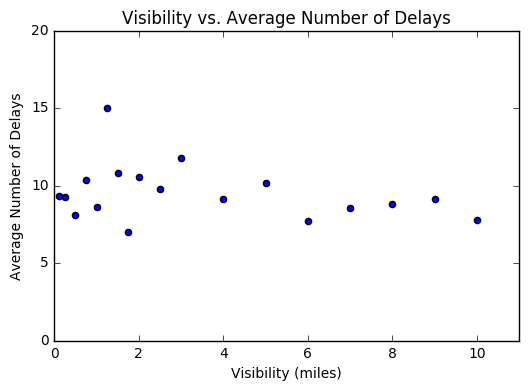

In [385]:
#Working on the combined df, grouping by visibility to see trends between
#delays and the weather variables
by_visib = df_weather_flights_merged.groupby([df_weather_flights_merged.visib])['TotalDelay', 'Count'].agg([np.mean]).reset_index()
print(by_visib)

#plot the data
plt.scatter(by_visib.visib, by_visib.TotalDelay)
plt.xlim(0, 11)
plt.ylim(0, 110)
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Visibility (miles)')
plt.title('Visibility vs. Average Departure Delay')
plt.show()

#plot the data
plt.scatter(by_visib.visib, by_visib.Count)
plt.xlim(0, 11)
plt.ylim(0, 20)
plt.ylabel('Average Number of Delays')
plt.xlabel('Visibility (miles)')
plt.title('Visibility vs. Average Number of Delays')
plt.show()

From the above graphics we can see that lower the visibility slightly higher are the average departure delay time and average count of number of delays. This proves that one of the weather variable like the visibility slightly impacts the flights from NYC.

To explore more below we can look at the impact of wind_speed on the flight delays

    wind_speed      Count  TotalDelay
                     mean        mean
0      0.00000   6.965066   32.212572
1      3.45234   7.073048   32.507615
2      4.60312   7.032075   34.932986
3      5.75390   7.375000   35.489686
4      6.90468   7.923205   38.881932
5      8.05546   7.447552   40.617614
6      9.20624   8.196213   39.996826
7     10.35702   8.170732   36.244881
8     11.50780   8.254167   41.321800
9     12.65858   8.559902   39.965520
10    13.80936   8.786350   40.934946
11    14.96014   9.021739   43.074567
12    16.11092   9.241379   46.835656
13    17.26170  10.050314   43.856463
14    18.41248   9.280303   40.581763
15    19.56326   8.567901   43.970152
16    20.71404  10.048387   45.427627
17    21.86482   9.285714   41.356599
18    23.01560  10.032258   36.087406
19    24.16638   9.307692   49.657713
20    25.31716  10.142857   50.013629
21    26.46794   8.375000   66.838477
22    27.61872  10.666667   35.056583
23    28.76950  11.142857  104.109409
24    29.920

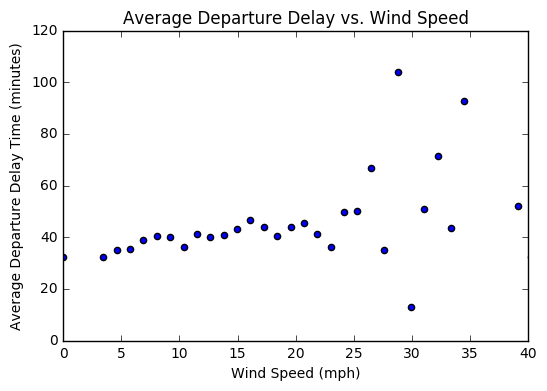

In [365]:
#Working on the df_weather_flights_merged df, grouping by wind_speed to see trends between 
#delays and the weather variables
df_wind_analysis = df_weather_flights_merged.dropna(subset = ['wind_speed'])

#Calculating average departure delays vs. wind_speed
by_wind = df_wind_analysis.groupby([df_wind_analysis.wind_speed])['Count','TotalDelay'].agg([np.mean]).reset_index()
print(by_wind)

#Plotting the data
plt.scatter(by_wind.wind_speed, by_wind.TotalDelay)
plt.xlim(0, 40)
plt.ylim(0, 120)
plt.ylabel('Average Departure Delay Time (minutes)')
plt.xlabel('Wind Speed (mph)')
plt.title('Average Departure Delay vs. Wind Speed')
plt.show()

Here, I have removed one observation from the graph as the information in the tuple seems to be an outlier. Values of wind_speed and wind_gust are 100 times greater than the other values in the same column. I have also omitted NA's from wind_speed column. I have grouped on wind_speed and calculated the average departure delay in minutes per value of wind speed (as there are only specific values of wind speed observed in the dataset, it actually is very much a continuous variable). The above graphic depicts that as the wind speed increases the average departure delay time increases. Thus wind_speed impacts flights from NYC.